In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on='city')
# Display the data table for preview
pyber_data = pyber_data.sort_values('city')
pyber_data


,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421
1521,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
1531,Amandaburgh,12,Urban,2018-02-06 10:02:30,11.93,7550325158038
1532,Amandaburgh,12,Urban,2018-04-24 08:02:27,14.55,7836117055007
1530,Amandaburgh,12,Urban,2018-04-22 21:34:17,42.52,1901157522591
1534,Amandaburgh,12,Urban,2018-03-07 02:26:33,18.76,3419454549176


## Bubble Plot of Ride Sharing Data

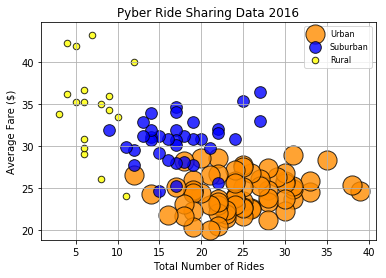

In [3]:
 # Obtain the x and y coordinates for each of the three city types

urban_ony = pyber_data.loc[pyber_data["type"] == "Urban", :]
suburban_only = pyber_data.loc[pyber_data["type"] == "Suburban", :]
rural_only = pyber_data.loc[pyber_data["type"] == "Rural", :]
urbancitygroup = urban_ony.groupby(['city'])
suburbancitygroup = suburban_only.groupby(['city'])
ruralcitygroup = rural_only.groupby(['city'])

urbanriders = urban_ony['city'].value_counts()
suburbanriders = suburban_only['city'].value_counts()
ruralriders = rural_only['city'].value_counts()
sumfare_urban = urbancitygroup['fare'].sum() 
averagefare_urban = sumfare_urban/ urbanriders #average fare urban
sumfare_suburban = suburbancitygroup['fare'].sum() 
averagefare_suburban = sumfare_suburban/ suburbanriders #average fare suburban
sumfare_rural = ruralcitygroup['fare'].sum()
averagefare_rural = sumfare_rural / ruralriders #average fare rural
urbandrivers = urban_ony['driver_count'].mean()
suburbandrivers = suburban_only['driver_count'].mean()
ruraldrivers = rural_only['driver_count'].mean()

#^ city types: groupbys, total riders,average fare

# Build the scatter plots for each city types
legend_urban = plt.scatter(urbanriders, averagefare_urban, marker="o", facecolors="darkorange", edgecolors="black",
            s=urbandrivers*10, alpha=.8)
legend_surburban = plt.scatter(suburbanriders, averagefare_suburban, marker="o", facecolors="blue", edgecolors="black",
            s=suburbandrivers*10,alpha=.8)
legend_rural = plt.scatter(ruralriders, averagefare_rural, marker="o", facecolors="yellow", edgecolors="black",
            s=ruraldrivers*10, alpha=.8)

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.grid()

plt.legend((legend_urban, legend_surburban, legend_rural),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           fontsize=8)


# Save Figure
plt.savefig("./Images/PyberGraph.png")
plt.show()

In [105]:
# Show plot
plt.show()

## Total Fares by City Type

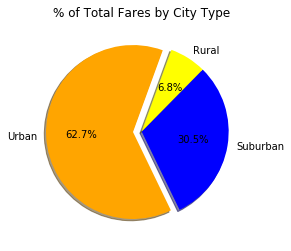

In [4]:
# Calculate Type Percents
totalfare_urban = urban_ony['fare'].sum()
totalfare_suburban = suburban_only['fare'].sum()
totalfare_rural = rural_only['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [totalfare_urban, totalfare_suburban, totalfare_rural]

colors = ["orange", "blue", "yellow"]

explode = (.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=70)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./Images/TotalFareByType.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

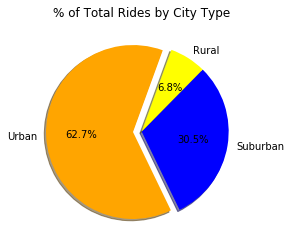

In [6]:
# Calculate Ride Percents
pie_urbanriders = urban_ony['city'].count()
pie_suburbanriders = suburban_only['city'].count()
pie_ruralriders = rural_only['city'].count()

# Build Pie Chart
sizestrbct = [pie_urbanriders, pie_suburbanriders, pie_ruralriders]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
      autopct="%1.1f%%", shadow=True, startangle=70), plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("./Images/TotalRidesByType.png")
plt.show()

In [109]:
# Show Figure
plt.show()

## Total Drivers by City Type

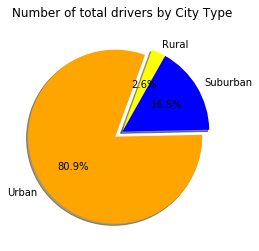

In [7]:
pie_total_urbandrivers = (urbancitygroup['driver_count'].sum() / urbancitygroup['city'].count()).sum()
pie_total_suburbandrivers = (suburbancitygroup['driver_count'].sum() / suburbancitygroup['city'].count()).sum()
pie_total_ruraldrivers = (ruralcitygroup['driver_count'].sum() / ruralcitygroup['city'].count()).sum()
#^ since I used the groupby dataset I had to take the average the dividing

#Build Pie Charts
sizestdct = [pie_total_urbandrivers, pie_total_suburbandrivers, pie_total_ruraldrivers]

plt.pie(sizestdct, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=70)
plt.title("Number of total drivers by City Type")

# Save Figure
plt.savefig("./Images/TotalDriversByType.png")
plt.show()

In [111]:
# Show Figure
plt.show()

In [ ]:
# Oberservation 1: Rural cities have less total rides and the prices are much higher. I'm curious 
# what all factors contribute to having such price point. While basic economics tells us this because of  
# demand being higher than supply but there are other factors to consider also. Are these customer constanstly 
# traveling out of the city? Does it just take longer to travel? The demand doesn't seem high in this area so 
# I'm assuming driver don't actually live in the area.

# Oberservation 2: There are some Urban cities that are under pricing their services because of there environment. 
# Naturally, if the demand is low, drivers would charge a higher price to work in a city but this isn't happening 
# with some of the cities in our dataset. This would probably relate to competition in the environment.

# Oberservation 3:  The price of Suburban cities is higher no matter the level of demand. There's competition in suburban
# cities but demand is high in these areas also.
# Overall, the data on suburban cities accurately displays the demand/interest for this service because the environment is setup
# for less competition with non ride-sharing transportation while showing the what customers are willing to pay for this service.
# The data in other city types has either too little or too much competition.

